In [1]:
import os
from keys import OPENAI_API_KEY
os.environ['OPENAI_API_KEY'] = OPENAI_API_KEY

## BabyAGI

### Flow Diagram

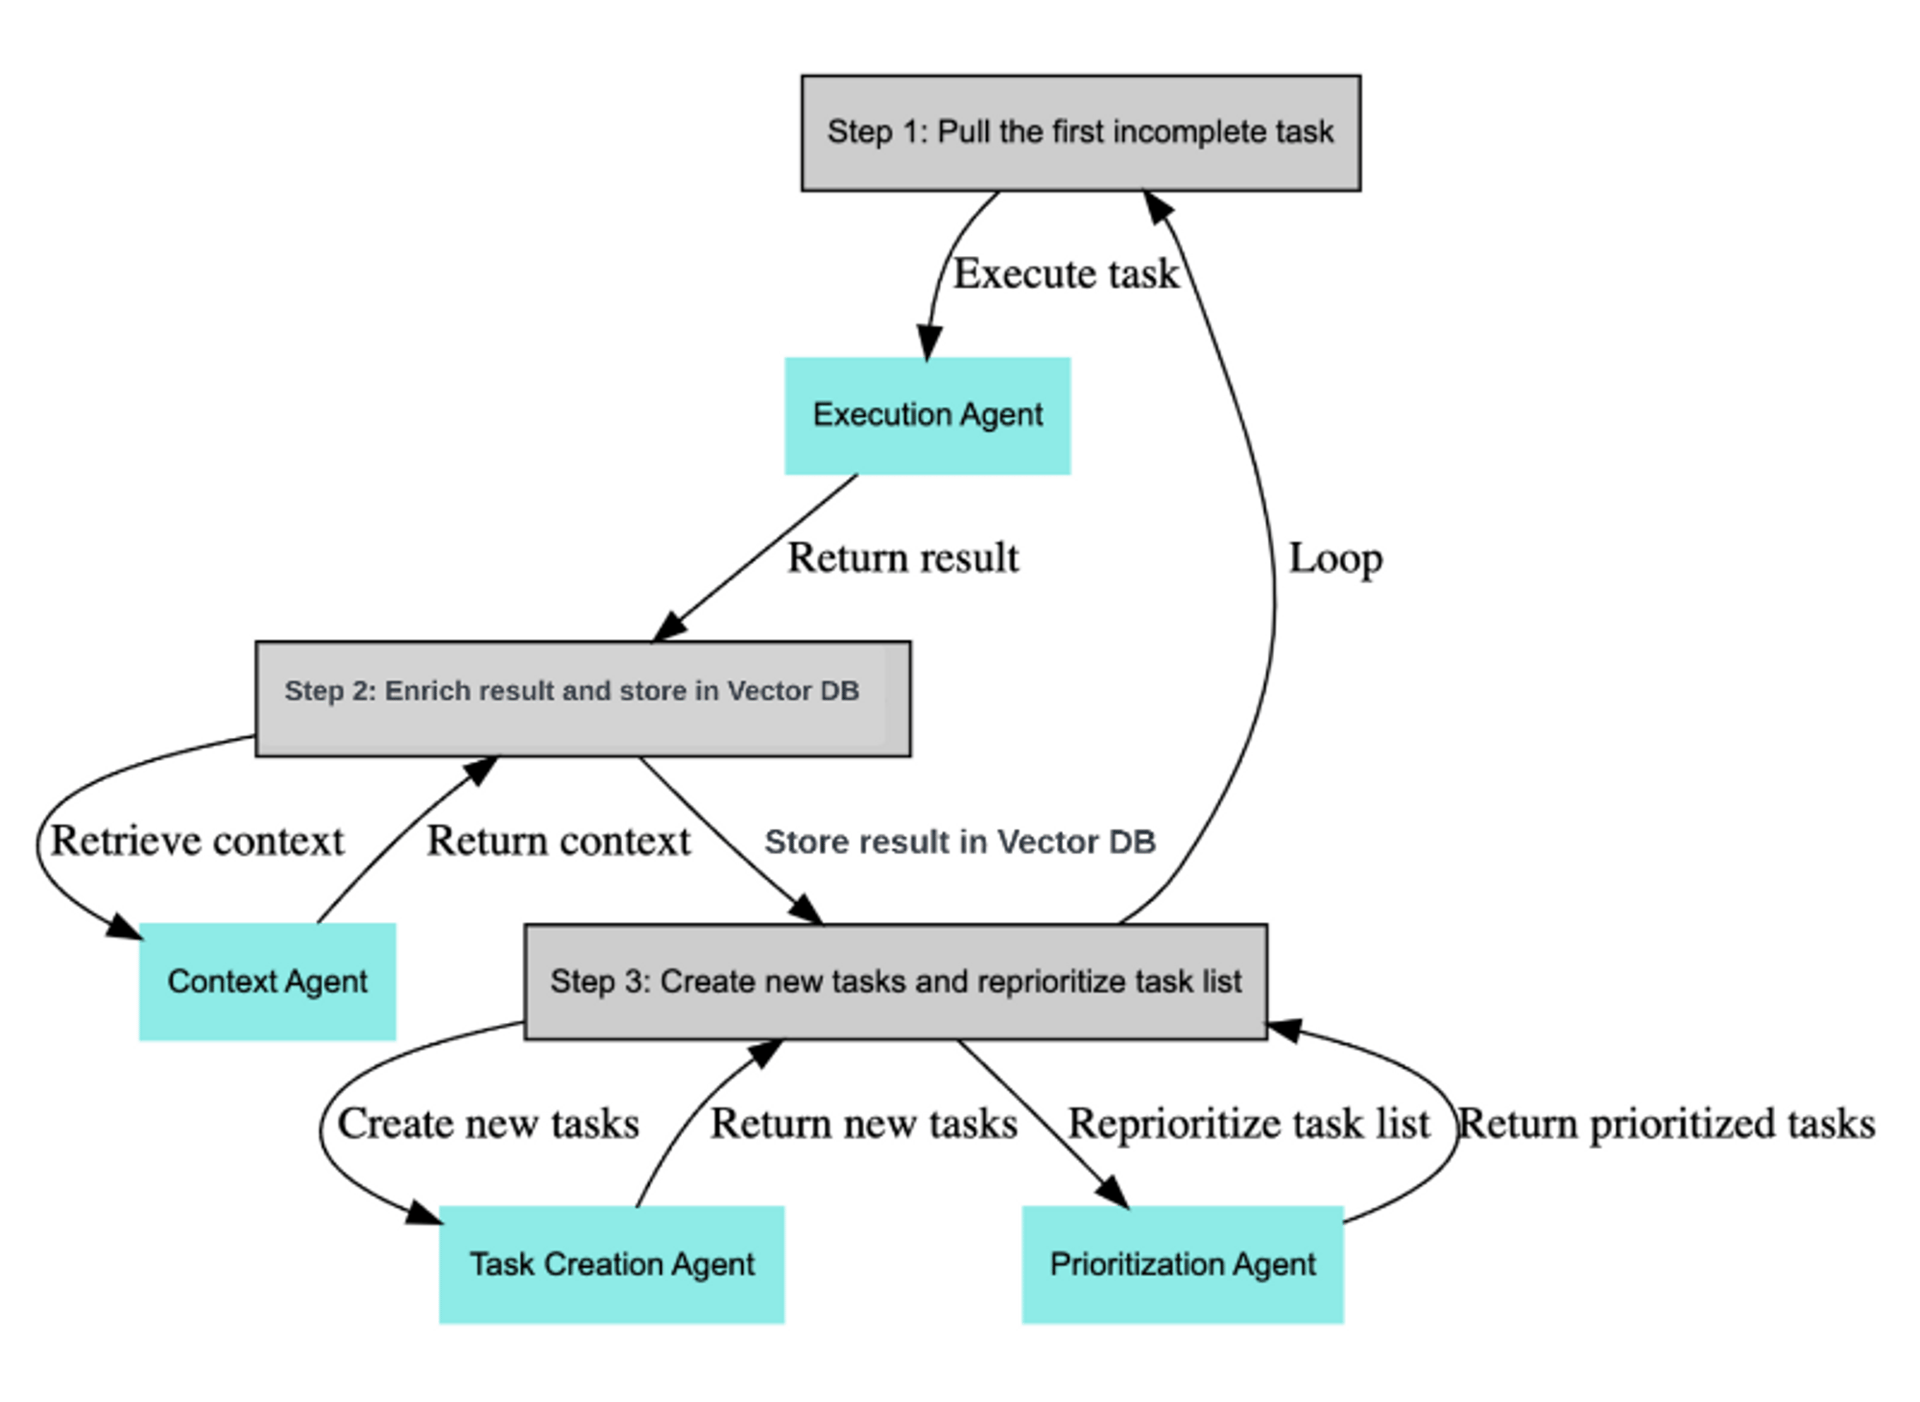

In [2]:
from PIL import Image
from io import BytesIO
from IPython.display import display
import requests

img_url = 'https://images.spr.so/cdn-cgi/imagedelivery/j42No7y-dcokJuNgXeA0ig/2e6e2922-2fa3-429d-9704-a96fed25b29e/babyagi/w=1920,quality=80'
res = requests.get(img_url, stream=True)
img = Image.open(BytesIO(res.content))
display(img)

In [2]:
from langchain.embeddings import OpenAIEmbeddings
import faiss
from langchain.vectorstores import FAISS
from langchain.docstore import InMemoryDocstore

# Define the embedding model
embeddings_model = OpenAIEmbeddings(model="text-embedding-ada-002")

# Initialize the vectorstore
embedding_size = 1536
index = faiss.IndexFlatL2(embedding_size)
vectorstore = FAISS(embeddings_model.embed_query, index, InMemoryDocstore({}), {})

In [3]:
from langchain import OpenAI
from langchain.experimental import BabyAGI

# set the goal
goal = "Plan a trip to the Grand Canyon"

# create thebabyagi agent
# If max_iterations is None, the agent may go on forever if stuck in loops
baby_agi = BabyAGI.from_llm(
    llm=OpenAI(model="text-davinci-003", temperature=0),
    vectorstore=vectorstore,
    verbose=False,
    max_iterations=3
)
response = baby_agi({"objective": goal})


*****TASK LIST*****

1: Make a todo list

*****NEXT TASK*****

1: Make a todo list

*****TASK RESULT*****



1. Research the best time to visit the Grand Canyon
2. Book flights to the Grand Canyon
3. Book a hotel near the Grand Canyon
4. Research the best activities to do at the Grand Canyon
5. Make a list of items to pack for the trip
6. Make a budget for the trip
7. Make a list of places to eat near the Grand Canyon
8. Make a list of souvenirs to buy at the Grand Canyon
9. Research the best way to get around the Grand Canyon
10. Make a list of any other necessary items to bring on the trip

*****TASK LIST*****

2: Research the best places to take pictures at the Grand Canyon
3: Research the best places to view wildlife at the Grand Canyon
4: Research the best places to hike at the Grand Canyon
5: Research the best places to camp at the Grand Canyon
6: Research the best places to take a tour at the Grand Canyon
7: Research the best places to buy souvenirs at the Grand Canyon
8: Resea

Retrying langchain.llms.openai.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised RateLimitError: Rate limit reached for default-text-davinci-003 in organization org-jmv25ZQj3Isy3eNyurbrenXP on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method..


KeyboardInterrupt: 